## 분류 알고리즘
- 분류(Classification)는 학습 데이터로 주어진 데이터의 피처와 레이블값(결정 값, 클래스 값)을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 이렇게 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측하는 것이다.

## 결정 트리와 앙상블
- 결정 트리는 매우 쉽고 유연하게 적용될 수 있는 알고리즘
- 데이터의 스케일링이나 정규화 등의 사전 가공의 영향이 매우 적다
- 하지만, 예측 성능을 향상시키기 위해 복잡한 규칙 구조를 가져야 하며, 이로 인한 과적합(overfitting)이 발생해 반대로 예측 성능이 저하될 수도 있다는 단점
- 위의 단점이 앙상블 기법에서는 오히려 장점으로 작용한다. 앙상블은 매우 많은 여러 개의 약한 학습기(즉, 예측 성능이 상대적으로 떨어지는 학습 알고리즘)를 결합해 확률적 보완과 오류가 발생한 부분에 대한 가중치를 계속 업데이트하면서 예측 성능을 향상시키는데, 결정 트리가 좋은 약한 학습기가 되기 때문이다.(GBM, XGBoost, LightGBM 등)

## 결정 트리
- 결정 트리 알고리즘은 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리(Tree) 기반의 분류 규칙을 만든(If-Else 기반 규칙)
- 따라서 데이터의 어떤 기준을 바탕으로 규칙을 만들어야 가장 효율적인 분류가 될 것인가가 알고리즘의 성능을 크게 좌우한다.

## 균일도 기반 규칙 조건
- 노란색 블록의 경우 모두 동그라미로 구성되고, 빨강과 파랑 블록의 경우는 동그라미, 네모, 세모가 골고루 섞여 있다고 한다면 각 레고 블록을 분류하고자 할 때 가장 첫 번째로 만들어져야 하는 규칙 조건은?
  - if 색깔 == '노란색'

## 정보 균일도 측정 방법
- 정보 이득(Information Gain)
  - 정보 이득은 엔트로피라는 개념을 기반으로 한다.
  - 엔트로피는 주어진 데이터 집합의 혼잡도를 의미하는데, 서로 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮다.
  - 정보 이득 지수는 1에서 엔트로피 지수를 뺀 값이다. 즉 1-엔트로피 지수이다.
  - 결정 트리는 이 정보 이득 지수로 분할 기준을 정한다. 즉, 정보 이득이 높은 속성을 기준으로 분할한다.
  - 엔트로피와 정반대
- 지니 계수
  - 경제학에서 불평등 지수를 나타낼 때 사용하는 계수
  - 0이 가장 평등, 1로 갈수록 불평등
  - 머신러닝에 적용될 때는 지니 계수가 낮을 수록 데이터 균일도가 높은 것으로 해석되어, 계수가 낮은 속성을 기준으로 분할

## 결정 트리의 규칙 노드 생성 프로세스
- 1. 데이터 집합의 모든 아이템이 같은 분류에 속하는지 확인
  - [If == True] 2-1. 리프 노드를 만들어서 분류 결정
  - [Else] 2-2. 데이터를 분할하는데 가장 좋은 속성과 분할 기준을 찾음 (정보이득 or 지니계수)
    - 3. 해당 속성과 분할 기준으로 데이터를 분할하여 규칙 브랜치 노드 생성
- 4. Recursive 하게 모든 데이터 집합의 분류가 결정될 때까지 수행 

## 결정 트리 장점
- 쉽다, 직관적이다
- 피처의 스케일링이나 정규화 등의 사전 가공 영향도가 크지 않음

## 경정 트리 단점
- 과적합으로 알고리즘 성능이 떨어진다.
  - 이를 극복하기 위해 트리의 크기를 사전에 제한하는 튜닝 필요

# 결정 트리 모델의 시각화 (Desition Tree Visualization)

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classfier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeCLassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [18]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names,
feature_names=iris_data.feature_names, impurity=True, filled=True)

In [19]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [20]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

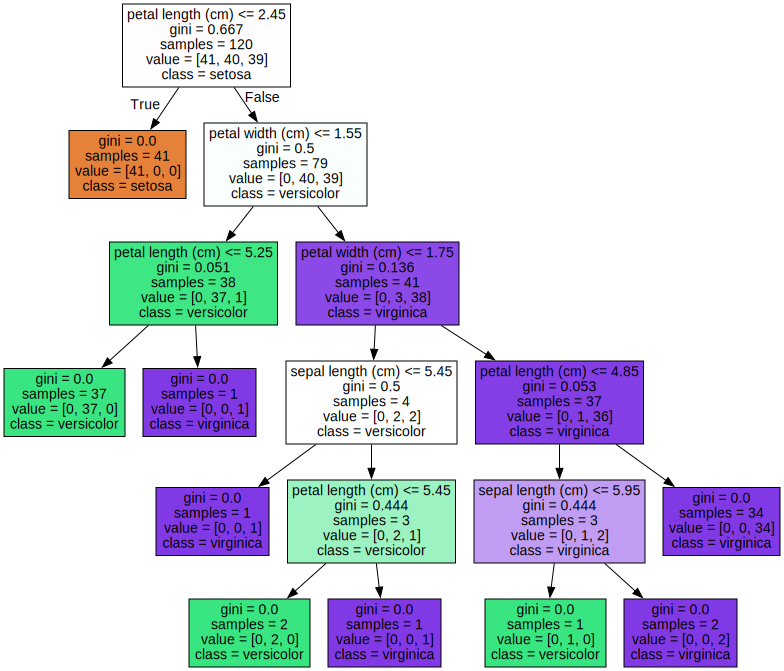

In [21]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open('tree.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

- petal length(cm) <= 2.45 와 같이 피처의 조건이 있는 것은 자식 노드를 만들기 위한 규칙 로건. 이 조건이 없으면 리프 노드이다.
- gini는 다음의 value=[ ]로 주어진 데이터 분포에서의 지니 계수
- samples는 현 규칙에 해당하는 데이터 건수
- value = [ ]는 클래스 값 기반의 데이터 건수. 붓꽃 데이터 세트는 클래스 값으로 0, 1, 2를 가지고 있으며 
  - 0: Setosa
  - 1: Versicolor
  - 2: Virginica 
  품종을 가리킨다. 
- 만일 Value = [41, 40, 39]라면 클래스 값의 순서로 Setosa 41개, Versicolor 40개, Virginica 39개로 데이터가 구성돼 있다는 의미
- class는 value 리스트내에 가장 많은 건수를 가진 결정값이다.

** 현재 max_depth를 설정하지 않아, 마지막 노드가 모두 리프 노드가 되었다. 이것은 과적합의 원인이 될 수 있다.

In [22]:
dt_clf.feature_importances_

array([0.02500521, 0.        , 0.55490281, 0.42009198])

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<AxesSubplot:>

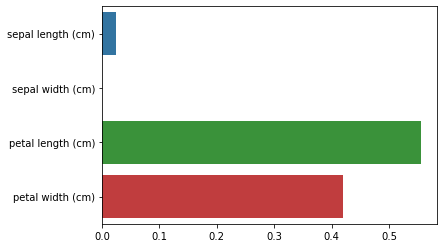

In [26]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0} : {1:.3f}'.format(name, value))

# feature importance를 cloumn 별로 시각화 하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)